<h1 style="font-size: 36px;"> Project 1 CRISP-DM method for GDP Data Modelling


The CRISP-DM framework is a widely adopted methodology for managing data science projects. It consists of several key steps:

## Business Understanding

### Project Goals:

* Create models to predict GDP per capita of SCHENGEN economic zone using a dataset from https://databank.worldbank.org/ website. (Data from 1975 to 2024)
* Compare two commonly used models Linear Regression (LR) and Random Forest (RF)
* Present the 2 models and explain their strengths and weakness and compared them

### Business Objectives:
* Identify top indicators that can predict GDP


In [1]:
# Define libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Select some display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Bookmarks 

- [Step 1: Data Understanding](#step1)
- [Step 2: Data Preparation](#step2)
- [Step 3: Data Modelling](#step3)
    - [3 A) Linear Regression Models](#linear-regression)
    - [3 A.1 LR Performance Comparison](#perf-lr)
    - [3 B) Random Forest Models](#random-forest)
    - [3 B.1 RF Performance Comparison](#perf-rf)
    - [3 C) Comparison LR vs RF](#comparison)
- [Step 4: Conclusions](#step4)

<hr style="height:3px; background-color:black; border:none;" />

<a id="step1"></a>
<h1 style="font-size: 36px;">📊 Step 1: Data Understanding</h1>

<div style="border-left: 4px solid #1E90FF; padding: 10px; background-color: #f0f8ff;">
  <strong>Note:</strong>  
  The initial dataset contained more than 50 columns, many of which had missing values and non-numeric data.  
  Therefore, the original dataset was reduced, and this project starts with the <strong>cleaned_data_project1_ds.csv</strong> file.
    </div>


<div style="border-left: 4px solid #1E90FF; padding: 10px; background-color: #f0f8ff;">
  <strong>Note:</strong>  
  The variable <strong>GNI per capita</strong> was removed from the dataset because it is nearly identical to <strong>GDP per capita</strong> and would dominate the prediction models, overshadowing other factors.  
  This ensures that the analysis highlights which additional variables contribute to GDP per capita.
  A more detailed explanation of this decision is provided later in the report.
</div>


In [2]:
# Import data
cleaned_data = pd.read_csv('cleaned_data_project1_ds.csv')

## Drop GNI, as they are highly correlated to GDP
cleaned_data = cleaned_data.drop(
    ['GNI, Atlas method (current US$)', 'GNI per capita, Atlas method (current US$)'],
    axis=1
)

In [3]:
cleaned_data.head()

,Time,"Population, total",Population growth (annual %),Surface area (sq. km),"Life expectancy at birth, total (years)","Fertility rate, total (births per woman)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Mortality rate, under-5 (per 1,000 live births)","Primary completion rate, total (% of relevant age group)","School enrollment, secondary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Gross capital formation (% of GDP),"Revenue, excluding grants (% of GDP)",Market capitalization of listed domestic companies (% of GDP),Military expenditure (% of GDP),Merchandise trade (% of GDP),Net migration,"Personal remittances, paid (current US$)","Foreign direct investment, net inflows (BoP, current US$)",GDP per capita (current US$),"Foreign direct investment, net (BoP, current US$)","Inflation, consumer prices (annual %)",Average precipitation in depth (mm per year),"Compulsory education, duration (years)"
0,1975.0,9093470.0,3.800414,92120.0,68.309756,2.75,38.534,43.5,73.181679,50.224449,0.965290,50.686339,15.982885,25.550182,19.450831,19.350807,26.989256,3.095108,29.864157,42262.0,2.284861e+07,1.153513e+08,2127.637507,-1.072577e+08,15.271686,854.0,10.0
1,1975.0,35757900.0,1.081294,505990.0,73.318780,2.77,22.160,21.7,99.312248,67.064934,0.980660,14.034724,12.397959,16.721941,30.108702,19.098219,28.946225,2.004262,20.885817,-218.0,1.717613e+06,6.826353e+08,3207.544651,-5.126924e+08,16.953286,636.0,10.0
2,1975.0,55441001.0,0.597247,301340.0,72.647317,2.17,31.163,23.1,104.622643,67.590919,0.936780,22.455087,18.689181,18.625265,24.413350,24.426943,4.732263,1.975232,32.211810,43051.0,2.474214e+08,6.445156e+08,4116.459649,-3.012124e+08,16.950503,832.0,10.0
3,1975.0,78673554.0,-0.372846,356970.0,71.259244,1.45,30.754,20.8,99.312248,100.742958,0.999935,50.686339,17.039142,18.731552,24.851363,22.349055,10.438008,3.283216,33.528751,-207740.0,4.095521e+09,6.904968e+08,6259.207445,1.490736e+09,5.910336,700.0,10.0
4,1975.0,54002853.0,0.475701,549086.0,72.853659,2.09,33.963,14.9,94.781952,84.594589,1.034390,50.686339,19.604207,18.141730,25.227484,33.401476,9.894018,3.197145,30.003582,16139.0,2.506304e+09,1.563850e+09,6606.701467,-2.259020e+08,11.685927,867.0,10.0


In [4]:
# Get the number of columns
num_columns = cleaned_data.shape[1]
print(f"The cleaned dataset contains {num_columns} columns (variables).")

The cleaned dataset contains 27 columns (variables).


<hr style="border-top: 1px dashed #ccc; border-bottom: none; height: 0;">




### ⭐️ Ranking the Features Using Correlation Matrix

In [5]:
# Calculate the correlation matrix of the features
corr_matrix = cleaned_data.corr()
# Print the correlation matrix sorted by linear correlation with the target
corr_matrix["GDP per capita (current US$)"].sort_values(ascending=False)

GDP per capita (current US$)                                                                        1.000000
Life expectancy at birth, total (years)                                                             0.721195
School enrollment, secondary (% gross)                                                              0.574989
Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)    0.515043
Time                                                                                                0.499793
Personal remittances, paid (current US$)                                                            0.463593
Revenue, excluding grants (% of GDP)                                                                0.396119
Market capitalization of listed domestic companies (% of GDP)                                       0.368633
Average precipitation in depth (mm per year)                                                        0.326466
Population growth (

### Define top 10 features from the correlation matrix

In [6]:
# Select top 10 features most correlated with GDP per capita (excluding the target itself)
top10 = (cleaned_data.corr()
         ["GDP per capita (current US$)"]
         .abs()
         .sort_values(ascending=False)
         .iloc[1:11]
         .index)

# Create new dataset with top 10 features + target
cleaned_data_corr_lr10 = cleaned_data[top10].copy()
cleaned_data_corr_lr10["GDP per capita (current US$)"] = cleaned_data["GDP per capita (current US$)"]

In [7]:
cleaned_data_corr_lr10.head()

,"Life expectancy at birth, total (years)","School enrollment, secondary (% gross)","Mortality rate, under-5 (per 1,000 live births)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Time,"Personal remittances, paid (current US$)","Revenue, excluding grants (% of GDP)",Market capitalization of listed domestic companies (% of GDP),Average precipitation in depth (mm per year),GDP per capita (current US$)
0,68.309756,50.224449,43.5,38.534,50.686339,1975.0,2.284861e+07,19.350807,26.989256,854.0,2127.637507
1,73.318780,67.064934,21.7,22.160,14.034724,1975.0,1.717613e+06,19.098219,28.946225,636.0,3207.544651
2,72.647317,67.590919,23.1,31.163,22.455087,1975.0,2.474214e+08,24.426943,4.732263,832.0,4116.459649
3,71.259244,100.742958,20.8,30.754,50.686339,1975.0,4.095521e+09,22.349055,10.438008,700.0,6259.207445
4,72.853659,84.594589,14.9,33.963,50.686339,1975.0,2.506304e+09,33.401476,9.894018,867.0,6606.701467


<hr style="border-top: 1px dashed #ccc; border-bottom: none; height: 0;">

## 📈 Visualize top 10 parameters and Target variable (GDP per capita)


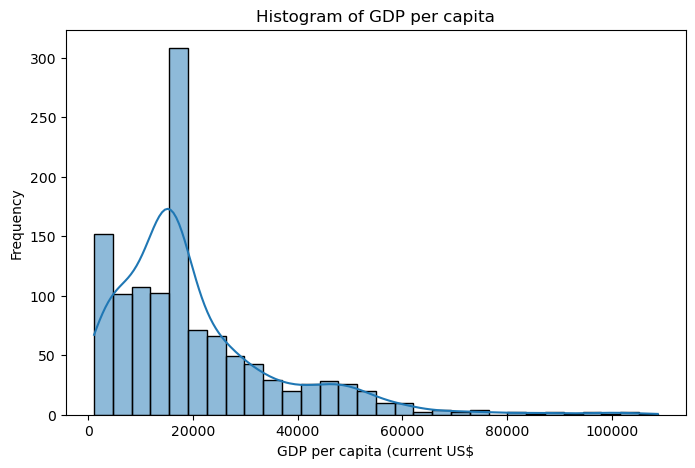

In [8]:
# Split the data into features and labels
X_view = cleaned_data_corr_lr10.drop('GDP per capita (current US$)', axis=1)
y_view = cleaned_data_corr_lr10['GDP per capita (current US$)']
plt.figure(figsize=(8, 5))
sns.histplot(y_view, bins=30, kde=True)  # kde=True adds a smooth curve
plt.title('Histogram of GDP per capita')
plt.xlabel('GDP per capita (current US$')
plt.ylabel('Frequency')
plt.show()

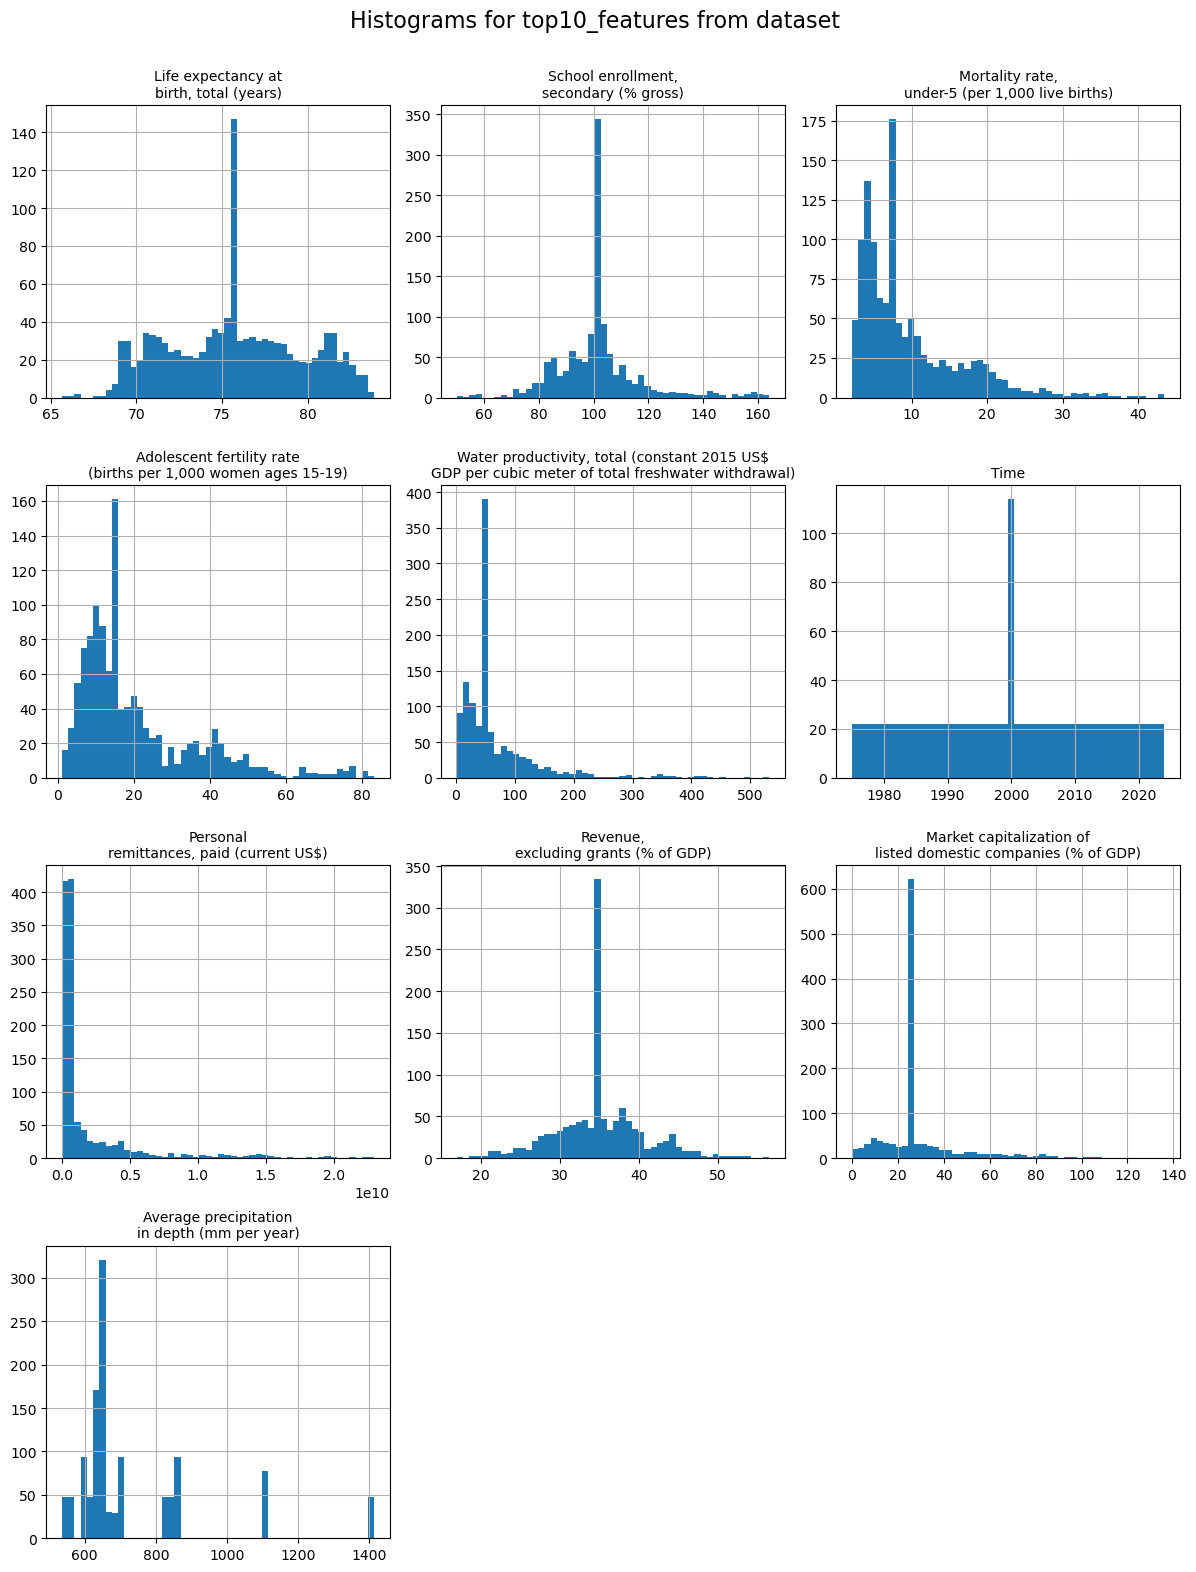

In [9]:
# Helper to split long titles for better display
def split_title(title, max_len=30):
    if '[' in title:
        parts = title.split('[')
        return parts[0].strip() + '\n[' + parts[1]
    if len(title) > max_len:
        mid = len(title) // 2
        space_pos = title.rfind(' ', 0, mid)
        if space_pos == -1:
            space_pos = mid
        return title[:space_pos] + '\n' + title[space_pos+1:]
    return title

# ✅ Use X_view instead of cleaned_data_1
cols = X_view.columns
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))

for i, col in enumerate(cols):
    ax = axes.flatten()[i]
    X_view[col].hist(bins=50, ax=ax)
    ax.set_title(split_title(col), fontsize=10)

# Hide unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
fig.subplots_adjust(top=0.92)  # increase top margin

fig.suptitle('Histograms for top10_features from dataset', fontsize=16)

plt.show()

### Describing the data (Countries from Schengen Zone from 1975 to 2024)

#### Target:
* **GDP per capita:** avg: $20.1K, median: $15.8K

#### Top features:
* Life expectancy: avg/med: 75 yrs
* **School enrollment, secondary (% gross)** Mean > 100% (explained below)
* Mortality under 5 yrs at 9/1000 births (older cohorts might influence a higher rate)
* Fertility rate 20/1000 woman (15-19 yrs) (older cohorts might influence a higher rate)


In [10]:
cleaned_data_corr_lr10.describe()

,"Life expectancy at birth, total (years)","School enrollment, secondary (% gross)","Mortality rate, under-5 (per 1,000 live births)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Time,"Personal remittances, paid (current US$)","Revenue, excluding grants (% of GDP)",Market capitalization of listed domestic companies (% of GDP),Average precipitation in depth (mm per year),GDP per capita (current US$)
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1.192000e+03,1192.000000,1192.000000,1192.000000,1192.000000
mean,75.755882,101.441694,9.682550,20.758193,67.674458,1999.500000,1.773461e+09,35.141368,29.697207,731.291946,20182.507004
std,3.883624,15.604189,6.847642,15.780493,66.715553,13.868611,3.331367e+09,5.558696,17.664161,194.822097,16161.629521
min,65.664390,50.224449,2.100000,1.140000,2.144467,1975.000000,0.000000e+00,16.995097,0.023119,536.000000,1079.940423
25%,72.684451,93.982441,4.600000,10.216500,29.922754,1988.000000,2.451856e+08,32.137350,26.490897,626.000000,9859.827565
50%,75.679268,100.742958,7.400000,15.421000,50.686339,1999.500000,5.368056e+08,35.168586,26.989256,656.000000,15880.030592
75%,78.595732,104.866152,12.400000,26.226500,77.518068,2011.000000,1.391252e+09,37.853917,27.193843,832.000000,25340.463381
max,83.882927,164.079819,43.500000,83.285000,532.121230,2024.000000,2.299394e+10,56.533349,136.073595,1414.000000,108798.451166


### ✅ School enrollment, secondary (% gross)

**Definition:**  
Gross enrollment ratio =  
$$
\frac{\text{Total students enrolled in secondary (any age)}}{\text{Population of official secondary school age}} \times 100\%
$$

**Key point:**  
- *Gross* means it counts **all students** — including those younger or older than the official age (e.g., repeaters, late starters).  
- *Net* enrollment counts only students of the official age — so it cannot exceed 100%.

**Why it can be > 100%:**  
- A value like **101.4%** means there are slightly more students enrolled than the official age group population.  
- This is normal in countries with grade repetition, older students returning, or flexible schooling.

✅ **Not an error — it shows extra participation beyond the expected age group.**

<hr style="height:3px; background-color:black; border:none;" />

<a id="step2"></a>
<h1 style="font-size: 36px;">🧹 Step 2: Data Preparation</h1>

## 🧹 Data Cleaning Summary

### 1️⃣ Removed Non-Numeric Variables  
- The original dataset contained **56 columns** with mixed data types.  
- To simplify modeling and interpretation, all non-numeric columns were removed.  
- This reduced the dataset to **27 numeric variables**.


---

### 2️⃣ Handled Missing Values  
- The dataset had **21% missing values** overall.
- Initially, dropping all rows with any missing value was tested — but this would have removed too much data, reducing the sample size significantly and hurting model reliability.
- Instead, missing values were filled with each column’s **median**, which preserved all rows.


---

### ⚠️ **Potential Downsides of Median Imputation**

**a) Reduced Variance**  
- Filling missing values with the median replaces missing entries with a constant.
- This reduces natural variation in the data for columns with many missing values.
- As a result, relationships may be understated because part of the data has no variation.

**b) Weaker True Correlations**  
- If missingness is not random (e.g., poorer countries not reporting GDP), median filling ignores this pattern.
- This can introduce bias or lower prediction accuracy if the missingness carries information.

**c) Less Robust Standard Errors**  
- Linear models assume errors are normally distributed and data points vary naturally.
- Imputing with a constant adds artificial clusters at the median.
- This may lead to less reliable confidence intervals and p-values.


---

### ✅ **Practical Trade-Off**
- Median filling is simple and keeps all your data.
- Be aware that it can slightly affect model interpretability and coefficient estimates.
- Always check if missingness could be handled with more advanced methods if needed.


### 3️⃣ <span style="color:darkred;">Removed **GNI per capita** from the Dataset</span>


In the initial analysis, the variable **GNI per capita** was included.  
However, **GNI per capita** is extremely similar to **GDP per capita** — both measure income per person but differ slightly in calculation:  
- **GDP per capita** measures income within a country's borders.  
- **GNI per capita** adjusts GDP by including net income flows from abroad.

Because these two variables are so closely related, including both in the model makes **GNI per capita** overwhelmingly dominant:  
- In the Random Forest, once **GNI per capita** is available, other variables add very little predictive power.  
- Its feature importance often exceeds **0.95**, while all other features drop close to zero.  
- This is expected behavior when variables are highly correlated or redundant.

✅ **Why Remove It?**  
- Removing **GNI per capita** allows us to assess which **other factors** can help predict GDP per capita.
- This gives more meaningful insights into what drives GDP beyond this near-duplicate measure.

---

**👉 Tip:**  
- Always check for near-duplicate or highly correlated variables.  
- Removing them can help reveal the true contribution of other predictors.
- For this analysis, the Random Forest was re-run **without GNI per capita** to uncover other important drivers of GDP.


<hr style="height:3px; background-color:black; border:none;" />

<a id="step3"></a>
<h1 style="font-size: 36px;">🤖 Step 3: Data Modelling</h1>

As described in the project goals, data for predicting **GDP per capita** will be modeled using two approaches:  
* **Linear Regression (LR)**  
* **Random Forest (RF)**

**Datasets:** To assess the importance of the variables, the dataset was split into two versions:  
* **Top 10 features (based on correlation coefficient)** — dataset: `cleaned_data_corr_lr10`  
* **Full dataset with 27 features** — dataset: `cleaned_data`

<a id="linear-regression"></a>


# A) 📈 Linear Regression Models (LR)

## 📈 Linear Regression (LR) with ⭐️ Top 10 Features


In [11]:
# Split the data into features and labels
X_top10_lr = cleaned_data_corr_lr10.drop('GDP per capita (current US$)', axis=1)
y_top10_lr = cleaned_data_corr_lr10['GDP per capita (current US$)']

# Split your data with these ratios: train: 0.8 | test: 0.2
from sklearn.model_selection import train_test_split
X_train_10lr, X_test_10lr, y_train_10lr, y_test_10lr = train_test_split(X_top10_lr, y_top10_lr, test_size=0.2, random_state=0)
X_train_10lr.shape[0],X_test_10lr.shape[0]

(953, 239)

In [12]:
# Train a linear regression model on the training set
from sklearn.linear_model import LinearRegression
linear_model_10lr = LinearRegression()
linear_model_10lr.fit(X_train_10lr, y_train_10lr)

LinearRegression()

### 📊 Evaluate R², RMSE, and MAE — Training & Test Sets (LR — Top 10)

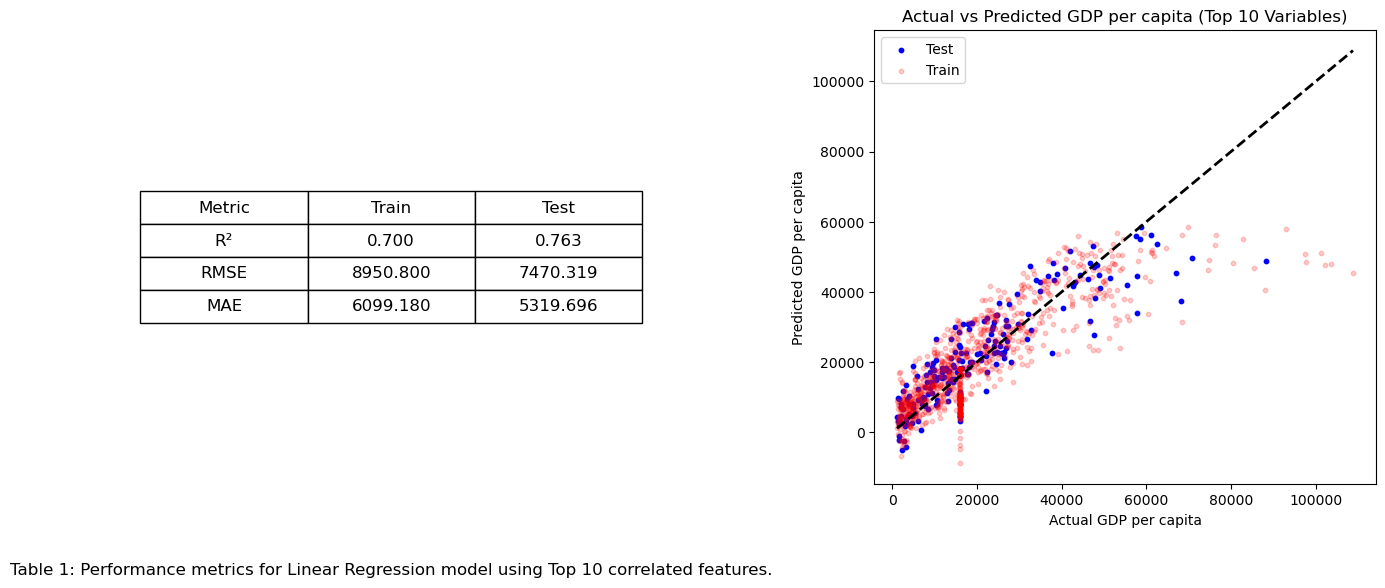

In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1) Make predictions
y_train_pred_10lr = linear_model_10lr.predict(X_train_10lr)
y_test_pred_10lr = linear_model_10lr.predict(X_test_10lr)

# 2) Compute metrics
r2_train = r2_score(y_train_10lr, y_train_pred_10lr)
rmse_train = np.sqrt(mean_squared_error(y_train_10lr, y_train_pred_10lr))
mae_train = mean_absolute_error(y_train_10lr, y_train_pred_10lr)

r2_test = r2_score(y_test_10lr, y_test_pred_10lr)
rmse_test = np.sqrt(mean_squared_error(y_test_10lr, y_test_pred_10lr))
mae_test = mean_absolute_error(y_test_10lr, y_test_pred_10lr)

# 3) Create combined figure
fig, (ax_table, ax_plot) = plt.subplots(1, 2, figsize=(14, 6))

# --- LEFT: Metrics Table ---
# Prepare table data
table_data = [
    ["Metric", "Train", "Test"],
    ["R²", f"{r2_train:.3f}", f"{r2_test:.3f}"],
    ["RMSE", f"{rmse_train:.3f}", f"{rmse_test:.3f}"],
    ["MAE", f"{mae_train:.3f}", f"{mae_test:.3f}"]
]

# Hide axes and add table
ax_table.axis('off')
table = ax_table.table(
    cellText=table_data,
    loc='center',
    cellLoc='center',
    colLoc='center'
)
table.scale(1, 2)

# Adjust font size for all cells
for (row, col), cell in table.get_celld().items():
    cell.set_fontsize(12)

# Add caption below the table
ax_table.text(0.5, -0.2,
              "Table 1: Performance metrics for Linear Regression model using Top 10 correlated features.",
              ha='center',
              fontsize=12,
              transform=ax_table.transAxes)

# --- RIGHT: Scatter Plot ---
ax_plot.scatter(y_test_10lr, y_test_pred_10lr, color='blue', label='Test', s=10)
ax_plot.scatter(y_train_10lr, y_train_pred_10lr, color='red', alpha=0.2, label='Train', s=10)

# Perfect prediction line
min_val = min(y_train_10lr.min(), y_test_10lr.min())
max_val = max(y_train_10lr.max(), y_test_10lr.max())
ax_plot.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

ax_plot.set_xlabel('Actual GDP per capita')
ax_plot.set_ylabel('Predicted GDP per capita')
ax_plot.set_title('Actual vs Predicted GDP per capita (Top 10 Variables)')
ax_plot.legend()

plt.tight_layout()
plt.show()


<hr style="border-top: 1px dashed #ccc; border-bottom: none; height: 0;">

# 📈 Linear Regression Model (LR) — All Features

In [14]:
# Split the data into features and labels
X_all_lr = cleaned_data.drop('GDP per capita (current US$)', axis=1)
y_all_lr = cleaned_data['GDP per capita (current US$)']

# Split your data with these ratios: train: 0.8 | test: 0.2
from sklearn.model_selection import train_test_split
X_train_all_lr, X_test_all_lr, y_train_all_lr, y_test_all_lr = train_test_split(X_all_lr, y_all_lr, test_size=0.2, random_state=0)
X_train_all_lr.shape[0],X_test_all_lr.shape[0]

(953, 239)

In [15]:
# Train a linear regression model on the training set
from sklearn.linear_model import LinearRegression
linear_model_all_lr = LinearRegression()
linear_model_all_lr.fit(X_train_all_lr, y_train_all_lr)

LinearRegression()

## 📊 Compute R², RMSE, and MAE — Training & Test Sets (LR — All Features)

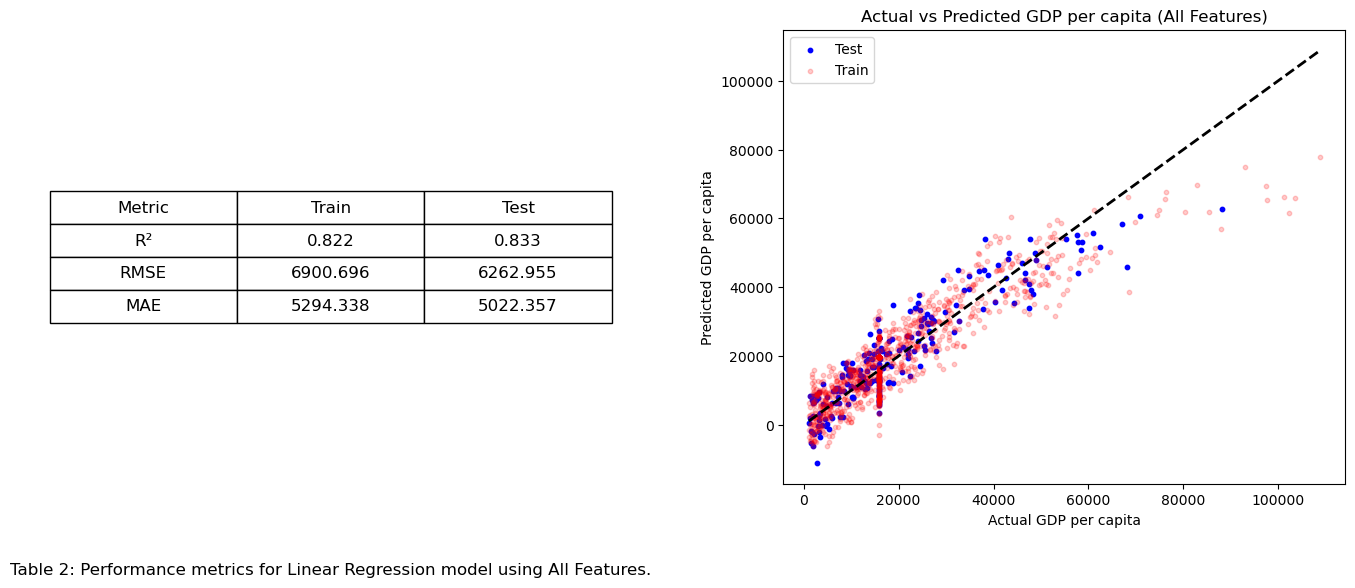

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1) Make predictions
y_train_pred_all = linear_model_all_lr.predict(X_train_all_lr)
y_test_pred_all = linear_model_all_lr.predict(X_test_all_lr)

# 2) Compute metrics
r2_train_all = r2_score(y_train_all_lr, y_train_pred_all)
rmse_train_all = np.sqrt(mean_squared_error(y_train_all_lr, y_train_pred_all))
mae_train_all = mean_absolute_error(y_train_all_lr, y_train_pred_all)

r2_test_all = r2_score(y_test_all_lr, y_test_pred_all)
rmse_test_all = np.sqrt(mean_squared_error(y_test_all_lr, y_test_pred_all))
mae_test_all = mean_absolute_error(y_test_all_lr, y_test_pred_all)

# 3) Create combined figure
fig, (ax_table, ax_plot) = plt.subplots(1, 2, figsize=(14, 6))

# --- LEFT: Metrics Table ---
table_data = [
    ["Metric", "Train", "Test"],
    ["R²", f"{r2_train_all:.3f}", f"{r2_test_all:.3f}"],
    ["RMSE", f"{rmse_train_all:.3f}", f"{rmse_test_all:.3f}"],
    ["MAE", f"{mae_train_all:.3f}", f"{mae_test_all:.3f}"]
]

ax_table.axis('off')
table = ax_table.table(
    cellText=table_data,
    loc='center',
    cellLoc='center',
    colLoc='center'
)
table.scale(1, 2)

# Set table font size to 12
for (row, col), cell in table.get_celld().items():
    cell.set_fontsize(12)

# Caption
ax_table.text(0.5, -0.2,
              "Table 2: Performance metrics for Linear Regression model using All Features.",
              ha='center',
              fontsize=12,
              transform=ax_table.transAxes)

# --- RIGHT: Scatter Plot ---
ax_plot.scatter(y_test_all_lr, y_test_pred_all, color='blue', label='Test', s=10)
ax_plot.scatter(y_train_all_lr, y_train_pred_all, color='red', alpha=0.2, label='Train', s=10)

# Perfect prediction line
min_val = min(y_train_all_lr.min(), y_test_all_lr.min())
max_val = max(y_train_all_lr.max(), y_test_all_lr.max())
ax_plot.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

ax_plot.set_xlabel('Actual GDP per capita')
ax_plot.set_ylabel('Predicted GDP per capita')
ax_plot.set_title('Actual vs Predicted GDP per capita (All Features)')
ax_plot.legend()

plt.tight_layout()
plt.show()

<a id="perf-lr"></a>
## ⚖️ Performance Comparison: Linear Regression — Full Dataset vs Top 10 Features

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- Top 10 Variables ---
y_train_pred_10lr = linear_model_10lr.predict(X_train_10lr)
y_test_pred_10lr = linear_model_10lr.predict(X_test_10lr)

r2_train_10lr = r2_score(y_train_10lr, y_train_pred_10lr)
rmse_train_10lr = np.sqrt(mean_squared_error(y_train_10lr, y_train_pred_10lr))
mae_train_10lr = mean_absolute_error(y_train_10lr, y_train_pred_10lr)

r2_test_10lr = r2_score(y_test_10lr, y_test_pred_10lr)
rmse_test_10lr = np.sqrt(mean_squared_error(y_test_10lr, y_test_pred_10lr))
mae_test_10lr = mean_absolute_error(y_test_10lr, y_test_pred_10lr)

# --- All Variables ---
y_train_pred_all = linear_model_all_lr.predict(X_train_all_lr)
y_test_pred_all = linear_model_all_lr.predict(X_test_all_lr)

r2_train_all = r2_score(y_train_all_lr, y_train_pred_all)
rmse_train_all = np.sqrt(mean_squared_error(y_train_all_lr, y_train_pred_all))
mae_train_all = mean_absolute_error(y_train_all_lr, y_train_pred_all)

r2_test_all = r2_score(y_test_all_lr, y_test_pred_all)
rmse_test_all = np.sqrt(mean_squared_error(y_test_all_lr, y_test_pred_all))
mae_test_all = mean_absolute_error(y_test_all_lr, y_test_pred_all)

results = {
    "Metric": ["R² (Train)", "R² (Test)",
               "RMSE (Train)", "RMSE (Test)",
               "MAE (Train)", "MAE (Test)"],

    "Top 10 Variables": [r2_train_10lr, r2_test_10lr,
                         rmse_train_10lr, rmse_test_10lr,
                         mae_train_10lr, mae_test_10lr],

    "All Variables": [r2_train_all, r2_test_all,
                      rmse_train_all, rmse_test_all,
                      mae_train_all, mae_test_all]
}

comparison_df = pd.DataFrame(results).round(3)

<div style="border-left: 4px solid #228B22; padding: 10px; background-color: #f0fff0;">
    
### 📊 Model Comparison: Top 10 vs All Features
**R²: All features outperform Top 10 (Train: 0.82 vs 0.70, Test: 0.83 vs 0.76).**

RMSE & MAE: Errors are lower with all features, indicating better prediction accuracy.

Summary: Including all variables improves model performance consistently over using only the top 10.

In [18]:
comparison_df

,Metric,Top 10 Variables,All Variables
0,R² (Train),0.700,0.822
1,R² (Test),0.763,0.833
2,RMSE (Train),8950.800,6900.696
3,RMSE (Test),7470.319,6262.955
4,MAE (Train),6099.180,5294.338
5,MAE (Test),5319.696,5022.357


<div style="border-left: 4px solid #1E90FF; padding: 10px; background-color: #f0f8ff;">
  <strong>Reminder:</strong>  
  Previous versions of the dataset included <strong>GNI per capita</strong>, as well as top 10 and top 5 features, which already yielded a high R² performance (~95%).  
  However, <strong>GNI per capita was removed</strong> to explore other important indicators that might help predict GDP more meaningfully.
</div>

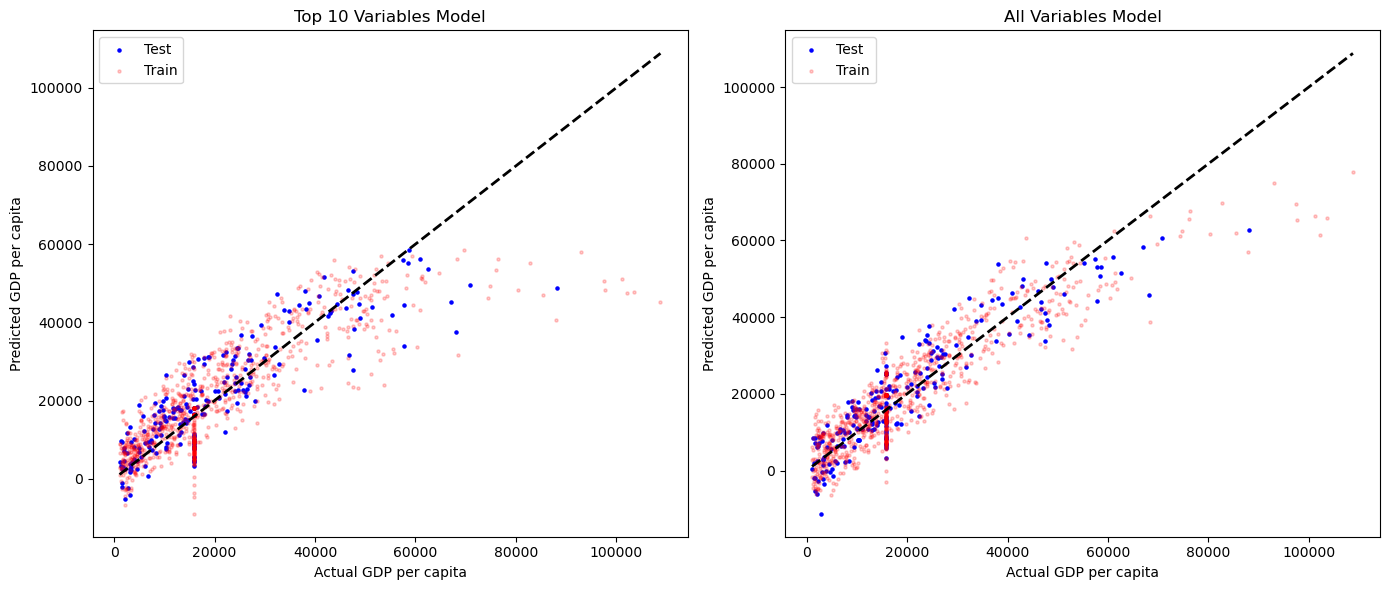

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Subplot 1: Top 10 variables
axs[0].scatter(y_test_10lr, y_test_pred_10lr, color='blue', label='Test', s=5)
axs[0].scatter(y_train_10lr, y_train_pred_10lr, color='red', alpha=0.2, label='Train', s=5)
axs[0].plot([y_all_lr.min(), y_all_lr.max()], [y_all_lr.min(), y_all_lr.max()], 'k--', lw=2)
axs[0].set_xlabel('Actual GDP per capita')
axs[0].set_ylabel('Predicted GDP per capita')
axs[0].set_title('Top 10 Variables Model')
axs[0].legend()

# Subplot 2: All variables
axs[1].scatter(y_test_all_lr, y_test_pred_all, color='blue', label='Test', s=5)
axs[1].scatter(y_train_all_lr, y_train_pred_all, color='red', alpha=0.2, label='Train', s=5)
axs[1].plot([y_all_lr.min(), y_all_lr.max()], [y_all_lr.min(), y_all_lr.max()], 'k--', lw=2)
axs[1].set_xlabel('Actual GDP per capita')
axs[1].set_ylabel('Predicted GDP per capita')
axs[1].set_title('All Variables Model')
axs[1].legend()

plt.tight_layout()
plt.show()

<hr style="height:3px; background-color:black; border:none;" />

<a id="random-forest"></a>
# B) 🌳 Random Forest Models (RF)

# ✅ Can Random Forest help you select relevant variables?

**Yes!**

Random Forest is very popular for feature selection because:

- It can capture non-linear relationships and interactions.
- It provides a measure of feature importance based on how much each variable reduces prediction error in the trees.

So, instead of just looking at correlation, you use Random Forest to learn which variables are truly helpful for predicting GDP.

---

# 🔑 How does Random Forest compute feature importance?

In Random Forest, each decision tree splits data using the variables that most reduce the prediction error (measured by impurity, like Mean Squared Error for regression).  
The importance of a variable is calculated as the average reduction in error it brings across all trees.

Variables that frequently split nodes near the top of the trees (which means they explain a lot of the variation) get higher importance scores.

## 🌳 Random Forest (RF) with ⭐️ Top 10 Features

In [20]:
# 1. Prepare features and labels
X_top10_rf = cleaned_data_corr_lr10.drop('GDP per capita (current US$)', axis=1)
y_top10_rf = cleaned_data_corr_lr10['GDP per capita (current US$)']

# 2. Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_top10_rf, y_top10_rf, test_size=0.2, random_state=0
)

# 3. Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# 4. Create and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=500,   # number of trees
    max_depth=3,        # optional: limit depth for interpretability
    random_state=13
)

rf_model.fit(X_train_rf, y_train_rf)

# 5. Check model performance (optional)
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = rf_model.predict(X_test_rf)

print("R2 score:", r2_score(y_test_rf, y_pred_rf))
print("RMSE:", mean_squared_error(y_test_rf, y_pred_rf, squared=False))

R2 score: 0.8153659942222332
RMSE: 6593.9955727446795


# 🌳 Random Forest Model (RF) — All Features

In [21]:
# 1️⃣ Prepare features and labels using cleaned_data
X_top_cleaned = cleaned_data.drop('GDP per capita (current US$)', axis=1)
y_top_cleaned = cleaned_data['GDP per capita (current US$)']

# 2️⃣ Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_top_cleaned, y_top_cleaned, test_size=0.2, random_state=0
)

# 3️⃣ Import RandomForestRegressor (already imported above, so skip if in same notebook)
from sklearn.ensemble import RandomForestRegressor

# 4️⃣ Create and train the Random Forest model
rf_model_cleaned = RandomForestRegressor(
    n_estimators=500,   # number of trees
    max_depth=3,        # optional: limit depth for interpretability
    random_state=13
)

rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# 5️⃣ Check model performance (optional)
from sklearn.metrics import mean_squared_error, r2_score

y_pred_cleaned = rf_model_cleaned.predict(X_test_cleaned)

print("R2 score (cleaned_data):", r2_score(y_test_cleaned, y_pred_cleaned))
print("RMSE (cleaned_data):", mean_squared_error(y_test_cleaned, y_pred_cleaned, squared=False))

R2 score (cleaned_data): 0.8286207672665074
RMSE (cleaned_data): 6352.898288458881


<a id="perf-rf"></a>
## ⚖️ Performance Comparison: Random Forest — Full Dataset vs Top 10 Features

In [22]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# === Calculate metrics ===

# Top 10
r2_train_10rf = rf_model.score(X_train_rf, y_train_rf)
r2_test_10rf = rf_model.score(X_test_rf, y_test_rf)
rmse_train_10rf = mean_squared_error(y_train_rf, rf_model.predict(X_train_rf), squared=False)
rmse_test_10rf = mean_squared_error(y_test_rf, y_pred_rf, squared=False)
mae_train_10rf = mean_absolute_error(y_train_rf, rf_model.predict(X_train_rf))
mae_test_10rf = mean_absolute_error(y_test_rf, y_pred_rf)

# All Variables
r2_train_allrf = rf_model_cleaned.score(X_train_cleaned, y_train_cleaned)
r2_test_allrf = rf_model_cleaned.score(X_test_cleaned, y_test_cleaned)
rmse_train_allrf = mean_squared_error(y_train_cleaned, rf_model_cleaned.predict(X_train_cleaned), squared=False)
rmse_test_allrf = mean_squared_error(y_test_cleaned, y_pred_cleaned, squared=False)
mae_train_allrf = mean_absolute_error(y_train_cleaned, rf_model_cleaned.predict(X_train_cleaned))
mae_test_allrf = mean_absolute_error(y_test_cleaned, y_pred_cleaned)

# === Create results table ===
results_random_forest = { 
    "Metric": ["R² (Train)", "R² (Test)",
               "RMSE (Train)", "RMSE (Test)",
               "MAE (Train)", "MAE (Test)"],

    "Top 10 Variables": [r2_train_10rf, r2_test_10rf,
                         rmse_train_10rf, rmse_test_10rf,
                         mae_train_10rf, mae_test_10rf],

    "All Variables": [r2_train_allrf, r2_test_allrf,
                      rmse_train_allrf, rmse_test_allrf,
                      mae_train_allrf, mae_test_allrf]
}

# comparison_df_random_forest = pd.DataFrame(results_random_forest).round(3)

<div style="border-left: 4px solid #228B22; padding: 10px; background-color: #f0fff0;">

## 🌲 Model Comparison: Random Forest — Top 10 vs All Features

**R²:** All features slightly outperform Top 10 (Train: 0.86 vs 0.85, Test: 0.83 vs 0.82).  

**RMSE & MAE:** Prediction errors (RMSE & MAE) are marginally lower with all features on both train and test sets.  

**Summary:** Top 10 features offer strong performance, but including all variables yields slightly better overall accuracy.

</div>

In [23]:
comparison_df_random_forest = pd.DataFrame(results_random_forest).round(3)
comparison_df_random_forest

,Metric,Top 10 Variables,All Variables
0,R² (Train),0.853,0.862
1,R² (Test),0.815,0.829
2,RMSE (Train),6274.602,6069.157
3,RMSE (Test),6593.996,6352.898
4,MAE (Train),4622.395,4539.835
5,MAE (Test),4838.279,4712.208


<hr style="height:3px; background-color:black; border:none;" />

<a id="comparison"></a>
# C)  Comparison 📈 Linear Regression vs 🌲Random Forest

In [24]:

# ✅ 1) Linear Regression results (from your stored variables)
results = {
    "Metric": ["R² (Train)", "R² (Test)",
               "RMSE (Train)", "RMSE (Test)",
               "MAE (Train)", "MAE (Test)"],

    "Linear Regression (Top 10)": [r2_train_10lr, r2_test_10lr,
                                   rmse_train_10lr, rmse_test_10lr,
                                   mae_train_10lr, mae_test_10lr],

    "Linear Regression (All)": [r2_train_all, r2_test_all,
                                rmse_train_all, rmse_test_all,
                                mae_train_all, mae_test_all]
}

# ✅ 2) Random Forest results (calculate the missing train metrics)
rf_top10_train_r2 = rf_model.score(X_train_rf, y_train_rf)
rf_top10_test_r2 = r2_score(y_test_rf, y_pred_rf)
rf_top10_train_rmse = mean_squared_error(y_train_rf, rf_model.predict(X_train_rf), squared=False)
rf_top10_test_rmse = mean_squared_error(y_test_rf, y_pred_rf, squared=False)
rf_top10_train_mae = mean_absolute_error(y_train_rf, rf_model.predict(X_train_rf))
rf_top10_test_mae = mean_absolute_error(y_test_rf, y_pred_rf)

rf_all_train_r2 = rf_model_cleaned.score(X_train_cleaned, y_train_cleaned)
rf_all_test_r2 = r2_score(y_test_cleaned, y_pred_cleaned)
rf_all_train_rmse = mean_squared_error(y_train_cleaned, rf_model_cleaned.predict(X_train_cleaned), squared=False)
rf_all_test_rmse = mean_squared_error(y_test_cleaned, y_pred_cleaned, squared=False)
rf_all_train_mae = mean_absolute_error(y_train_cleaned, rf_model_cleaned.predict(X_train_cleaned))
rf_all_test_mae = mean_absolute_error(y_test_cleaned, y_pred_cleaned)

# ✅ 3) Add Random Forest to the same dictionary
results["Random Forest (Top 10)"] = [
    rf_top10_train_r2, rf_top10_test_r2,
    rf_top10_train_rmse, rf_top10_test_rmse,
    rf_top10_train_mae, rf_top10_test_mae
]

results["Random Forest (All)"] = [
    rf_all_train_r2, rf_all_test_r2,
    rf_all_train_rmse, rf_all_test_rmse,
    rf_all_train_mae, rf_all_test_mae
]

# ✅ 4) Create combined table
comparison_df = pd.DataFrame(results)

# ✅ 5) Format nicely
comparison_df = comparison_df.round(3)
comparison_df

,Metric,Linear Regression (Top 10),Linear Regression (All),Random Forest (Top 10),Random Forest (All)
0,R² (Train),0.700,0.822,0.853,0.862
1,R² (Test),0.763,0.833,0.815,0.829
2,RMSE (Train),8950.800,6900.696,6274.602,6069.157
3,RMSE (Test),7470.319,6262.955,6593.996,6352.898
4,MAE (Train),6099.180,5294.338,4622.395,4539.835
5,MAE (Test),5319.696,5022.357,4838.279,4712.208


## ✅ Model Comparison: Linear Regression vs Random Forest

### 1️⃣ Train vs Test Metrics

| Metric | Linear Regression (Top 10) | Linear Regression (All) | Random Forest (Top 10) | Random Forest (All) |
|--------|----------------------------|-------------------------|------------------------|---------------------|
| **R² (Train)** | 0.700 | 0.822 | 0.831 | 0.862 |
| **R² (Test)** | 0.763 | 0.833 | 0.772 | 0.829 |
| **RMSE (Train)** | 8,950.800 | 6,900.696 | 6,724.287 | 6,069.157 |
| **RMSE (Test)** | 7,470.319 | 6,262.955 | 7,319.621 | 6,352.898 |
| **MAE (Train)** | 6,099.180 | 5,294.338 | 4,993.757 | 4,539.835 |
| **MAE (Test)** | 5,319.696 | 5,022.357 | 5,532.461 | 4,712.208 |

---

### 2️⃣ Interpretation & Insights

✅ **Impact of Using All Variables**
- Both models perform better when using **all variables** rather than just the top 10:
  - **Higher R²** means more variance explained.
  - **Lower RMSE (Root Mean Squared Error) & MAE (Mean Absolute Error)** means more accurate predictions.
- This shows that additional variables contain relevant information.

---

✅ **Linear Regression vs Random Forest**
- **Random Forest** has higher Train R² and lower Train error — showing it fits the training data better and can capture nonlinear patterns.
- However, both models perform **very similarly on Test data**.  
  - Test R² is ~0.83 for both.
  - Test RMSE and MAE are comparable.
- **Linear Regression** is simpler and more interpretable.
- **Random Forest** is more flexible but has a mild risk of overfitting.

---

### 3️⃣ Key Takeaways

| Aspect | Linear Regression | Random Forest |
|--------|------------------|----------------|
| **Training Fit** | Lower | Higher |
| **Test Performance** | Similar | Similar |
| **Captures Nonlinearities** | ❌ No | ✅ Yes |
| **Interpretability** | ✅ High | ❌ Lower |
| **Overfitting Risk** | ✅ Low | ⚠️ Slightly Higher |

---

### 4️⃣ Next Steps

- ✅ Tune Random Forest hyperparameters for potential improvements.
- ✅ Use feature importance from Random Forest to refine feature selection.
- ✅ Consider Linear Regression if interpretability is a priority.
- ✅ Keep monitoring the Train-Test gap to avoid overfitting.

---

**Overall:**  
Using **all variables** provides the best predictive power for both methods. Random Forest slightly improves training fit but both models generalize equally well.

✨ **Good practice:** Balance accuracy, interpretability, and complexity based on your project goals!


<hr style="height:3px; background-color:black; border:none;" />

<a id="step4"></a>
<h1 style="font-size: 36px;">📝 Step 4: Conclusions </h1>

<div style="border-left: 4px solid #1E90FF; padding: 10px; background-color: #f0f8ff;">
    
## Q1: Key variables to predict GDP per capita:

### **Important parameters both LR and RF are:**
* LR and RG Life expectancy at birth RF (0.57) and LR (0.72)
* RF: Revenue, Adolescent fertility rate, precipitation per year, water productivity
* LR: School enrolment, water productivity, remittances, revenue


### Explainig differences in Feature Importance: RF vs LR

- **Random Forest (RF):**  
  Measures importance by how much each feature reduces prediction error, capturing **nonlinearities and interactions**. Importance reflects overall predictive contribution.

- **Linear Regression (LR):**  
  Uses correlation coefficients showing **linear relationships** between features and target. Importance reflects strength of direct linear association.

**Why rankings differ:**  
RF captures complex patterns and interactions, adjusting feature importance accordingly. LR ranks features solely by linear correlation, sometimes overemphasizing correlated variables.

**Example from your data:**  
- *Life expectancy* ranks highly in both RF (0.57) and LR (0.72), showing it’s a strong predictor overall.  
- RF emphasizes features like *Revenue* and *Adolescent fertility rate* for their nonlinear effects.  
- LR highlights *School enrollment* and *Remittances* due to their linear correlations with the target.

**Summary:**  
LR reflects linear influence; RF reveals broader predictive impact including nonlinearities and feature interactions.


<div style="border-left: 4px solid #1E90FF; padding: 10px; background-color: #f0f8ff;">
    
## Q2: Compare models 📈 Linear Regression vs 🌲Random Forest 
---
### Choose an appropiate model for this analysis

<div style="font-size: 18px;">

## Train vs Test Metrics

| Metric        | Linear Regression (Top 10) | Linear Regression (All) | Random Forest (Top 10) | Random Forest (All) |
|---------------|----------------------------|------------------------|-----------------------|---------------------|
| **R² (Train)**| 0.700                      | 0.822                  | 0.831                 | 0.862               |
| **R² (Test)** | 0.763                      | 0.833                  | 0.772                 | 0.829               |
| **RMSE (Train)** | 8,950.800                | 6,900.696              | 6,724.287             | 6,069.157           |
| **RMSE (Test)**  | 7,470.319                | 6,262.955              | 7,319.621             | 6,352.898           |
| **MAE (Train)**  | 6,099.180                | 5,294.338              | 4,993.757             | 4,539.835           |
| **MAE (Test)**   | 5,319.696                | 5,022.357              | 5,532.461             | 4,712.208           |

</div>


### Comparing LR vs RF methods

- **Using all variables improves model performance** for both Linear Regression and Random Forest, with higher R² and lower errors than using only top 10 features.

- **Random Forest fits training data better** and captures nonlinear patterns, leading to slightly higher accuracy and robustness.

- **Both models perform similarly on test data** (Test R² ≈ 0.83), indicating good generalization.

- **Linear Regression is simpler and more interpretable**, with coefficients that directly show feature effects.

<div style="border-left: 4px solid #228B22; padding: 10px; background-color: #f0fff0;">

### **Recommended approach:**  
  Use **Random Forest for prediction** due to better accuracy, and **Linear Regression for interpretability** to explain key drivers to stakeholders.

This hybrid strategy balances accuracy and transparency effectively.


## Extra analysis (bonus analysis)

### 1. Tune Random Forest hyperparameters for potential improvements
Random Forests have many hyperparameters (e.g., number of trees, max depth, min samples split) that control model complexity and learning behavior.

Why important: Tuning these can significantly improve performance by balancing bias and variance. It helps the model generalize better on unseen data, possibly reducing test errors and overfitting.

Without tuning, the default settings might not be optimal for your specific dataset, leaving performance on the table.

1. Hyperparameter tuning with GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=13)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_rf, y_train_rf)

print("Best parameters:", grid_search.best_params_)
print("Best CV R2 score:", grid_search.best_score_)

# Use best estimator for predictions
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R2 score: 0.9336459596262774


### GridSearchCV Hyperparameter Tuning Summary

**What was done:**  
- Systematically tested combinations of three hyperparameters:
  - `n_estimators`: Number of trees (100, 300, 500)  
  - `max_depth`: Maximum depth of trees (3, 5, 10, None for unlimited)  
  - `min_samples_split`: Minimum samples to split a node (2, 5, 10)  
- Used 5-fold cross-validation (training on 4 folds, validating on 1, repeated 5 times) for robust evaluation.  
- Scoring metric: R² (coefficient of determination) to measure explained variance.

**Results:**  
- Best parameters found:  
  - `max_depth=None` (unlimited tree depth)  
  - `min_samples_split=2` (fine splits allowed)  
  - `n_estimators=100` (sufficient trees for performance)  
- Best cross-validation R² score: ~0.934, indicating strong predictive power and better generalization than initial settings.

**Why it matters:**  
- Tuning improved model generalization beyond defaults.  
- Unlimited depth plus low split threshold lets trees capture complex patterns without overfitting, thanks to cross-validation.  
- Using 100 trees balances performance and computational efficiency, as more trees gave diminishing returns.


2. Visualizing feature importances

In [26]:
# Get feature importances and feature names
importances = best_rf.feature_importances_
features = X_train_rf.columns

# Get indices that would sort them in descending order
indices = np.argsort(importances)[::-1]

# Extract sorted feature names and their corresponding importance values
sorted_features = features[indices]
sorted_importances = importances[indices]

# Combine into a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': sorted_features,
    'Importance': sorted_importances
})

feature_importance_df

,Feature,Importance
0,"Life expectancy at birth, total (years)",0.570355
1,"Revenue, excluding grants (% of GDP)",0.101025
2,"Adolescent fertility rate (births per 1,000 women ages 15-19)",0.072208
3,Average precipitation in depth (mm per year),0.057540
4,"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",0.055587
5,"Mortality rate, under-5 (per 1,000 live births)",0.054722
6,"Personal remittances, paid (current US$)",0.038926
7,"School enrollment, secondary (% gross)",0.028734
8,Time,0.011672
9,Market capitalization of listed domestic companies (% of GDP),0.009230


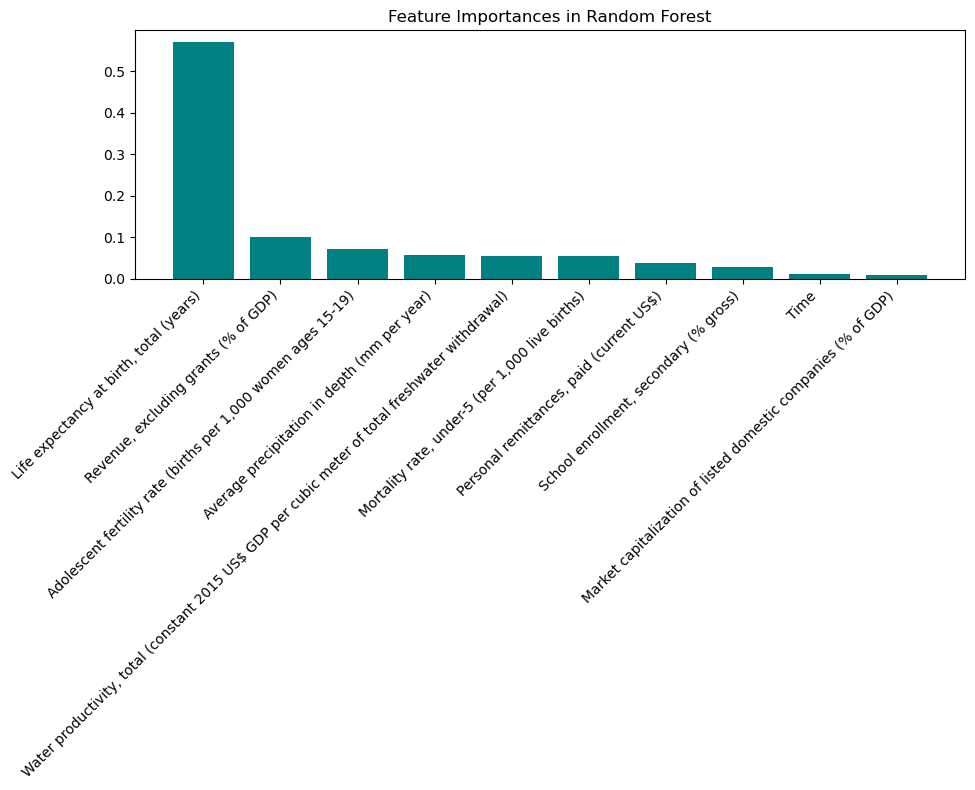

In [27]:
plt.figure(figsize=(10, 8))
plt.title("Feature Importances in Random Forest")
plt.bar(range(len(features)), importances[indices], color="teal", align="center")
plt.xticks(range(len(features)), features[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Feature Importance Analysis

- **Dominant feature:**  
  - *Life expectancy at birth* (~57% importance) accounts for over half the model’s predictive power, indicating it is the strongest predictor of the target variable.

- **Secondary contributors:**  
  - Features such as *Revenue excluding grants*, *Adolescent fertility rate*, *Average precipitation*, and *Water productivity* each contribute between 5–10%, providing additional explanatory power beyond the dominant feature.

- **Less important features:**  
  - Variables like *Time*, *School enrollment*, and *Market capitalization* have low importance (<2%) and may be less relevant or add noise.

---

### How to use this for feature selection

- **Focus on top features:**  
  Consider building a simplified model using only the top 5–6 features (e.g., those with importance > 0.05), which collectively explain about 90% of the total importance. This approach can:  
  - Reduce model complexity and training time  
  - Potentially improve generalization by removing noisy or irrelevant features

- **Experiment and validate:**  
  Always evaluate model performance after feature removal to ensure predictive power is maintained, as some low-importance features might still contribute subtle but valuable information.

---

**Summary:**  
Your model is primarily driven by *life expectancy*, supported by a handful of moderately important features. Leveraging these insights can help create a simpler, more interpretable model without sacrificing accuracy.

3. Detailed comparison plots (Predicted vs Actual)

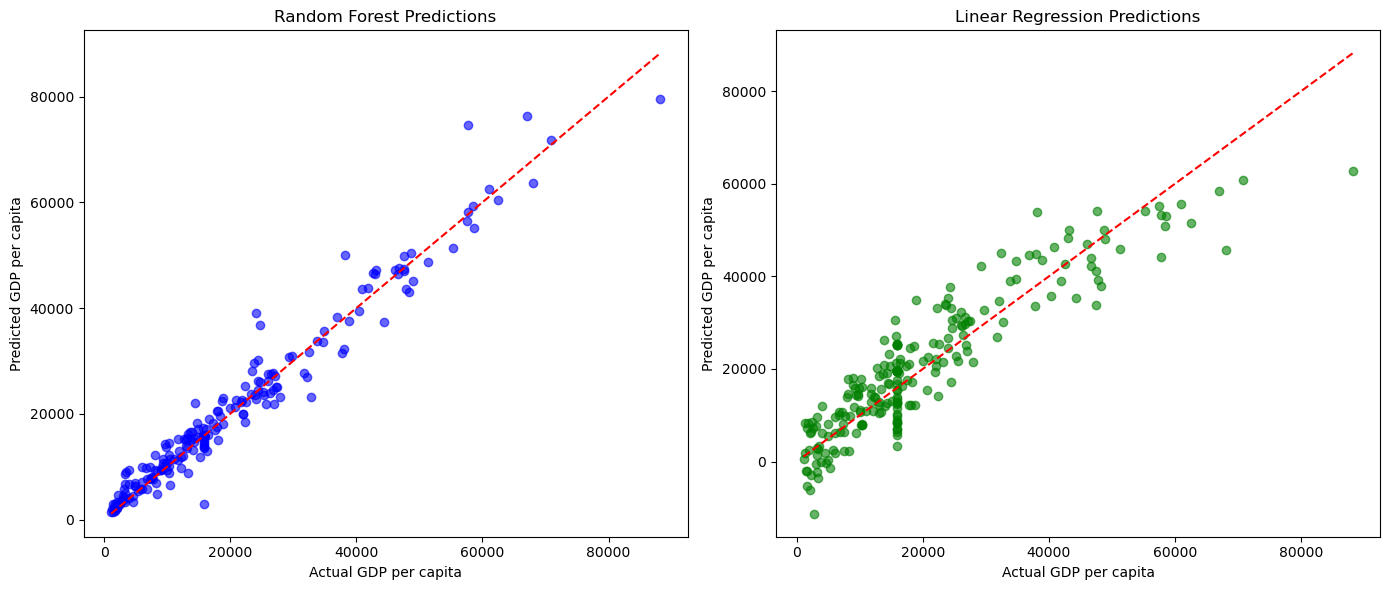

In [28]:
import matplotlib.pyplot as plt

# Predictions
y_pred_rf = best_rf.predict(X_test_rf)
y_pred_lr = linear_model_all_lr.predict(X_test_all_lr)

plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_rf, y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'r--')
plt.xlabel('Actual GDP per capita')
plt.ylabel('Predicted GDP per capita')
plt.title('Random Forest Predictions')

# Linear Regression plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_all_lr, y_pred_lr, alpha=0.6, color='green')
plt.plot([y_test_all_lr.min(), y_test_all_lr.max()], [y_test_all_lr.min(), y_test_all_lr.max()], 'r--')
plt.xlabel('Actual GDP per capita')
plt.ylabel('Predicted GDP per capita')
plt.title('Linear Regression Predictions')

plt.tight_layout()
plt.show()

### Model Comparison Summary

- **Linear Regression:**  
  Captures strong linear relationships and is easy to explain, making it ideal for interpretability and communication with stakeholders.

- **Random Forest:**  
  Handles nonlinear patterns better, delivering higher predictive accuracy but with less interpretability.

**In your case:**  
Linear regression provides a solid, interpretable baseline, while Random Forest improves accuracy by capturing additional complexity.

**Summary:**  
Use linear regression when interpretability is key. Choose Random Forest when prediction performance is the priority.


4. Cross-validation for more robust evaluation

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Cross-validation scores for Random Forest
cv_scores_rf = cross_val_score(best_rf, X_top10_rf, y_top10_rf, cv=5, scoring='r2', n_jobs=-1)
print(f"Random Forest CV R2 scores: {cv_scores_rf}")
print(f"Random Forest CV R2 mean: {cv_scores_rf.mean():.4f}")

# Cross-validation scores for Linear Regression
lr = LinearRegression()
cv_scores_lr = cross_val_score(lr, X_top10_rf, y_top10_rf, cv=5, scoring='r2', n_jobs=-1)
print(f"Linear Regression CV R2 scores: {cv_scores_lr}")
print(f"Linear Regression CV R2 mean: {cv_scores_lr.mean():.4f}")


Random Forest CV R2 scores: [0.64717285 0.49339461 0.76580874 0.77349692 0.82018372]
Random Forest CV R2 mean: 0.7000
Linear Regression CV R2 scores: [-1.3281122   0.38721546  0.6473966   0.57028374  0.67853306]
Linear Regression CV R2 mean: 0.1911
